# Basic time-series classification machine learning workflow using timegpy

## Premise

XX

## Import packages

In [22]:
import numpy as np
from timegpy.gp import evolve
from timegpy.create import create
from timegpy.plots import plot_hist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Simulate data

XXXX

In [2]:
def generate_ar1_vs_noise(N, T, phi, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # AR(1) samples
    ar1_data = np.zeros((N, T))
    for i in range(N):
        noise = np.random.normal(0, 1, T)
        ar1 = np.zeros(T)
        ar1[0] = noise[0]
        for t in range(1, T):
            ar1[t] = phi * ar1[t - 1] + noise[t]
        ar1_data[i] = ar1

    # Gaussian noise samples
    noise_data = np.random.normal(0, 1, (N, T))

    # Combine
    X = np.vstack([ar1_data, noise_data])

    # Labels
    y = np.array([1] * N + [0] * N)

    return X, y

X, y = generate_ar1_vs_noise(N=100, T=100, phi=0.8, seed=123)

## Run the genetic programming algorithm

XX

In [ ]:
df_all, df_best = evolve(
    X, y,
    max_lag_terms=6,
    n_generation_improve=5,
    seed=123,
    n_procs=5
)

## Check that the single best feature is as expected

XX

<module 'matplotlib.pyplot' from '/Users/trenthenderson/Documents/Git/timegpy/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

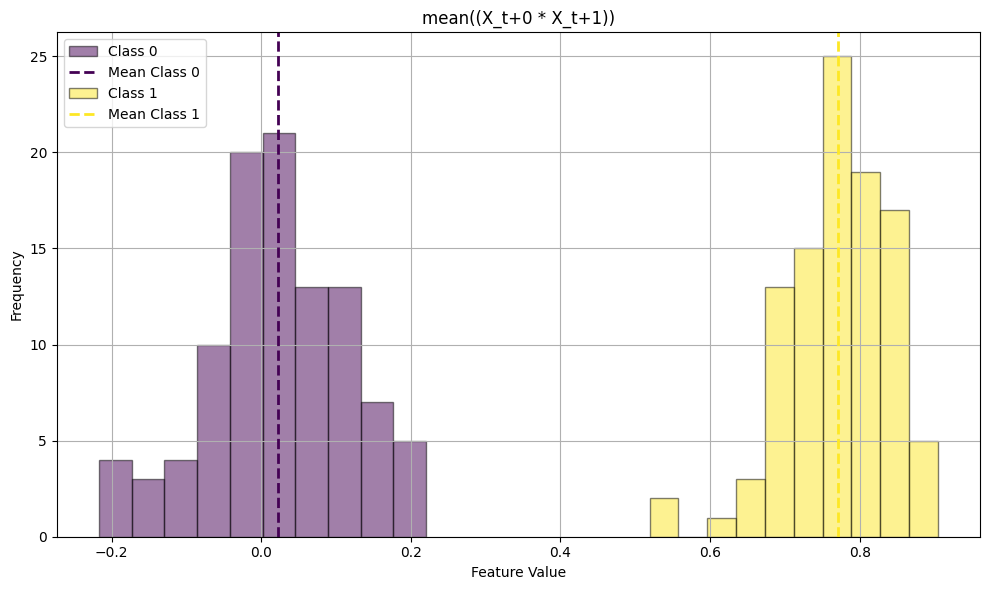

In [6]:
plot_hist(df_best.iloc[0]['expression'], X, y, z_score=True)

## Find the top 10 unique time-average features to use going forward

XX

In [4]:
top_expressions = (
    df_all.sort_values(by="fitness_parsimony", ascending=False)
         .drop_duplicates(subset="expression")
         .head(10)
         .expression
         .tolist()
)

print("Top 10 unique expressions:")
for expr in top_expressions:
    print(expr)

Top 10 unique expressions:
mean((X_t+0 * X_t+1))
mean((((X_t+0 + X_t+3) * (X_t+2 + X_t+2)) - (X_t+1 * X_t+3)))
mean((((X_t+0 - (X_t+4 - (X_t+5 * X_t+4))) + X_t+6) - X_t+8))
mean((((X_t+0 + X_t+2) * (X_t+1 / -0.5399)) - (X_t+2 / X_t+2)))
mean(((X_t+0 * X_t+1) + ((X_t+5 / X_t+5) - (cos((X_t+3 ^ 3)) - X_t+2))))
mean((((X_t+0 * cos(X_t+4)) - (X_t+7 - X_t+6)) - (X_t+7 * X_t+8)))
mean((((X_t+0 + X_t+3) * (X_t+6 + X_t+2)) - (X_t+1 * X_t+3)))
mean(((X_t+0 + X_t+3) * (((X_t+4 - X_t+6) + X_t+6) * 0.2658)))
mean((((X_t+0 * X_t+2) + X_t+8) - (X_t+2 + (sin((X_t+1 ^ 4)) * cos(X_t+4)))))
mean(((((X_t+0 / 0.7843) + X_t+2) * (X_t+2 - 0.5623)) + sin((X_t+4 ^ 3))))


## Create training dataset matrix using the time-series data and the top 10 time-average features

XX

In [8]:
X_features = create(top_expressions, X, z_score=True)

## Create test set by simulating new data and calculating values on the top 10 time-average features

XX

In [13]:
X2, y2 = generate_ar1_vs_noise(N=100, T=100, phi=0.5, seed=42)
X2_features = create(top_expressions, X2, z_score=True)

## Fit binary classifier

XX

In [14]:
clf = LogisticRegression()
clf.fit(X_features, y)
y2_pred = clf.predict(X2_features)

## Calculate classification accuracy

XX

In [16]:
acc = accuracy_score(y2, y2_pred)
print(f"Test set classification accuracy: {acc:.3f}")

Test set classification accuracy: 0.830
